# Importando base de dados

In [1]:
import pandas as pd

In [2]:
pd.read_csv('dados/tips.csv')

,total_bill,tip,dessert,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4
...,...,...,...,...,...,...
239,29.03,5.92,No,Sat,Dinner,3
240,27.18,2.00,Yes,Sat,Dinner,2
241,22.67,2.00,Yes,Sat,Dinner,2
242,17.82,1.75,No,Sat,Dinner,2


In [3]:
dados = pd.read_csv('dados/tips.csv')

In [4]:
dados.head()

,total_bill,tip,dessert,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4


# Tradução

In [5]:
# Peguei os dados contido nas colunas
dados.columns

Index(['total_bill', 'tip', 'dessert', 'day', 'time', 'size'], dtype='object')

In [6]:
# Criei um dicionário com os dados da coluna e o valor na qual gostaria de mudar
renomear = {'total_bill' : 'valor_da_conta', 
            'tip' : 'gorjeta', 
            'dessert' : 'sobremesa', 
            'day' : 'dia_da_semana', 
            'time': 'hora_do_dia', 
            'size' : 'total_de_pessoas'}

In [7]:
type(dados)

pandas.core.frame.DataFrame

In [8]:
# renomei os dados e atribui em uma nova variável
gorjetas = dados.rename(columns = renomear)

In [9]:
gorjetas.head()

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4


In [10]:
# para visualizar todos os tipos que aparecem
gorjetas.sobremesa.unique()

array(['No', 'Yes'], dtype=object)

In [11]:
sim_nao = {'No' : 'Não', 
           'Yes' : 'Sim'}

In [12]:
# para conseguir mapear
gorjetas.sobremesa.map(sim_nao)

0      Não
1      Não
2      Não
3      Não
4      Não
      ... 
239    Não
240    Sim
241    Sim
242    Não
243    Não
Name: sobremesa, Length: 244, dtype: object

In [13]:
gorjetas.head(3)

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3


In [14]:
# atribuir o valor do map para a variavel gorjeta
gorjetas.sobremesa = gorjetas.sobremesa.map(sim_nao)

In [15]:
gorjetas.head()

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,Não,Sun,Dinner,2
1,10.34,1.66,Não,Sun,Dinner,3
2,21.01,3.50,Não,Sun,Dinner,3
3,23.68,3.31,Não,Sun,Dinner,2
4,24.59,3.61,Não,Sun,Dinner,4


In [16]:
# Identificando os valores contido na dada coluna
gorjetas.dia_da_semana.unique()

array(['Sun', 'Sat', 'Thur', 'Fri'], dtype=object)

In [17]:
# Associando o valor contido na coluna com o novo valor que queira ser atribuido a mesma
dias ={'Sun' : 'Domingo', 
       'Sat' : 'Sábado', 
       'Thur' : 'Quinta', 
       'Fri' : 'Sexta'}

In [18]:
# associando e substituindo o valor antigo pelo novo
gorjetas.dia_da_semana = gorjetas.dia_da_semana.map(dias)

In [19]:
gorjetas.head()

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,Não,Domingo,Dinner,2
1,10.34,1.66,Não,Domingo,Dinner,3
2,21.01,3.50,Não,Domingo,Dinner,3
3,23.68,3.31,Não,Domingo,Dinner,2
4,24.59,3.61,Não,Domingo,Dinner,4


In [20]:
gorjetas.hora_do_dia.unique()

array(['Dinner', 'Lunch'], dtype=object)

In [21]:
hora = {'Dinner' : 'Jantar', 
        'Lunch' : 'Almoço'}

In [22]:
gorjetas.hora_do_dia = gorjetas.hora_do_dia.map(hora)

In [23]:
gorjetas.head(1)

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,Não,Domingo,Jantar,2


# Importando o Seaborn

In [24]:
!pip install seaborn

In [25]:
import seaborn as sns

In [26]:
!pip show seaborn

Name: seaborn
Version: 0.11.0
Summary: seaborn: statistical data visualization
Home-page: https://seaborn.pydata.org
Author: Michael Waskom
Author-email: mwaskom@nyu.edu
License: BSD (3-clause)
Location: d:\anaconda3\lib\site-packages
Requires: numpy, pandas, matplotlib, scipy
Required-by: 


# Análise 1 - Valor da conta e gorjeta

In [27]:
gorjetas.columns

Index(['valor_da_conta', 'gorjeta', 'sobremesa', 'dia_da_semana',
       'hora_do_dia', 'total_de_pessoas'],
      dtype='object')

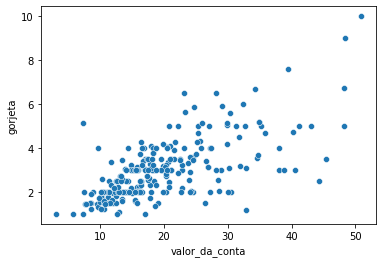

In [28]:
# Chamando o seaborn
valor_gorjeta = sns.scatterplot(x='valor_da_conta', y='gorjeta', data=gorjetas)

#### Visualmente o valor da gorjeta aumenta conforme aumenta o valor da conta

In [29]:
# Quantos registros tem na base de dados
print('A base de dados contém {} registros \n'.format(gorjetas.shape[0]))
# Quantos registros não são nulos 
print('Registros não nulos')
gorjetas.count()

A base de dados contém 244 registros 

Registros não nulos


valor_da_conta      244
gorjeta             244
sobremesa           244
dia_da_semana       244
hora_do_dia         244
total_de_pessoas    244
dtype: int64

## Criando o campo porcentagem 

In [30]:
gorjetas.head(1)

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,Não,Domingo,Jantar,2


In [31]:
# Criando um campo a mais 
gorjetas['porcentagem'] = gorjetas['gorjeta'] / gorjetas['valor_da_conta']

In [32]:
gorjetas.head(1)

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas,porcentagem
0,16.99,1.01,Não,Domingo,Jantar,2,0.059447


In [33]:
# Arredondando para duas casas decimais
gorjetas.porcentagem = gorjetas.porcentagem.round(2)

In [34]:
gorjetas.head(3)

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas,porcentagem
0,16.99,1.01,Não,Domingo,Jantar,2,0.06
1,10.34,1.66,Não,Domingo,Jantar,3,0.16
2,21.01,3.50,Não,Domingo,Jantar,3,0.17


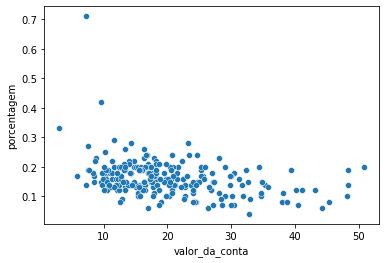

In [35]:
porcentagem_conta = sns.scatterplot(x='valor_da_conta', y='porcentagem', data=gorjetas)

#### Visualmente o valor da conta não é porporcional ao valor da gorjeta

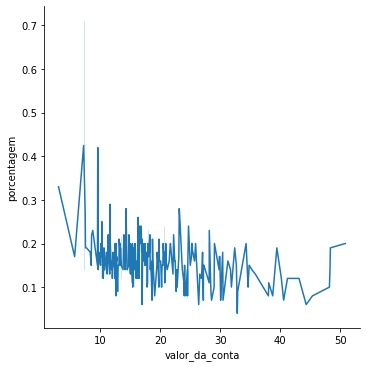

In [36]:
# Fazendo com um gráfico tipo linha
porcentagem_conta_linha = sns.relplot(x='valor_da_conta', y='porcentagem',kind='line', data=gorjetas)

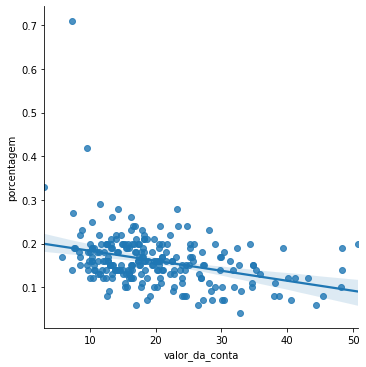

In [37]:
# Qual é a progreção que estamos tendo??
sns.lmplot(x='valor_da_conta', y='porcentagem', data=gorjetas)

## Mais funções

In [38]:
# Se tentar acessar somente pelo nome, vai dar o endereço da memória que se encontra a imagem
valor_gorjeta

<AxesSubplot:xlabel='valor_da_conta', ylabel='gorjeta'>

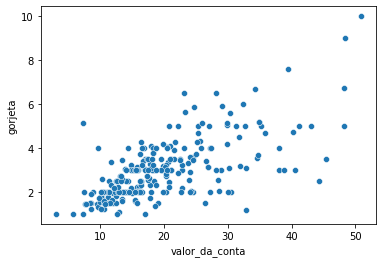

In [39]:
# Para ver a imagem é preciso:
valor_gorjeta.get_figure()

In [40]:
# Para adicionar um subtitulo a imagem
valor_gorjeta.figure.suptitle('Valor da conta x Gorjeta')

Text(0.5, 0.98, 'Valor da conta x Gorjeta')

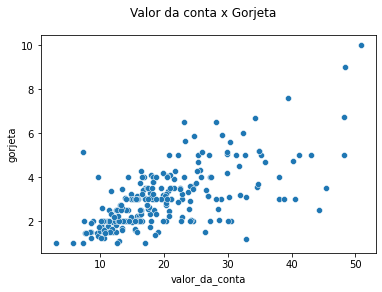

In [41]:
valor_gorjeta.get_figure()

In [42]:
# Inserindo um título
valor_gorjeta.set_title('Análise do valor da gorjeta em função do valor da conta')

Text(0.5, 1.0, 'Análise do valor da gorjeta em função do valor da conta')

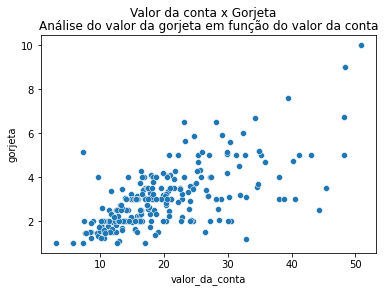

In [43]:
valor_gorjeta.get_figure()

In [44]:
# Alterando labels
valor_gorjeta.set(xlabel= 'Valor da conta', ylabel='Valor da gorjeta')

[Text(0.5, 18.106250000000003, 'Valor da conta'),
 Text(17.200000000000003, 0.5, 'Valor da gorjeta')]

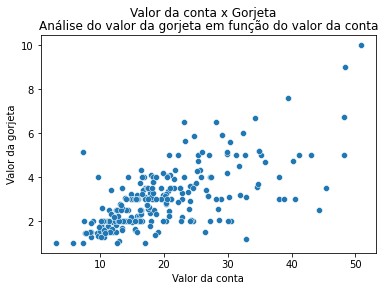

In [45]:
valor_gorjeta.get_figure()

In [46]:
# Salvando uma imagem
imagem = valor_gorjeta.get_figure()
imagem.savefig('dados/imagem.png')

### fim.

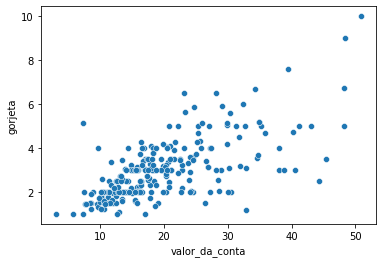

In [47]:
valor_gorjeta = sns.scatterplot(x='valor_da_conta', y='gorjeta', data=gorjetas)

# Análise 2 - Sobremesa

In [48]:
gorjetas.head()

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas,porcentagem
0,16.99,1.01,Não,Domingo,Jantar,2,0.06
1,10.34,1.66,Não,Domingo,Jantar,3,0.16
2,21.01,3.50,Não,Domingo,Jantar,3,0.17
3,23.68,3.31,Não,Domingo,Jantar,2,0.14
4,24.59,3.61,Não,Domingo,Jantar,4,0.15


In [49]:
# Para descrever todos ods registros que pediram sobremesa
gorjetas[gorjetas.sobremesa=='Sim'].describe()

,valor_da_conta,gorjeta,total_de_pessoas,porcentagem
count,93.000000,93.000000,93.000000,93.000000
mean,20.756344,3.008710,2.408602,0.163226
std,9.832154,1.401468,0.810751,0.085060
min,3.070000,1.000000,1.000000,0.040000
25%,13.420000,2.000000,2.000000,0.110000
50%,17.920000,3.000000,2.000000,0.150000
75%,26.860000,3.680000,3.000000,0.200000
max,50.810000,10.000000,5.000000,0.710000


In [50]:
gorjetas[gorjetas.sobremesa=='Não'].describe()

,valor_da_conta,gorjeta,total_de_pessoas,porcentagem
count,151.000000,151.000000,151.000000,151.000000
mean,19.188278,2.991854,2.668874,0.159536
std,8.255582,1.377190,1.017984,0.039889
min,7.250000,1.000000,1.000000,0.060000
25%,13.325000,2.000000,2.000000,0.140000
50%,17.590000,2.740000,2.000000,0.160000
75%,22.755000,3.505000,3.000000,0.185000
max,48.330000,9.000000,6.000000,0.290000


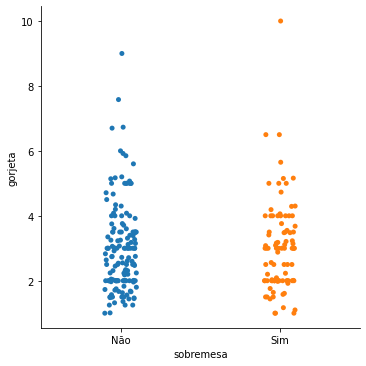

In [51]:
sns.catplot(x='sobremesa', y='gorjeta', data=gorjetas)

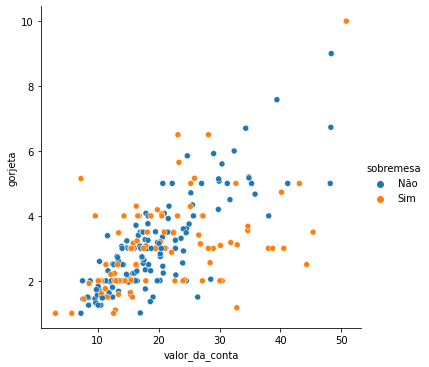

In [52]:
sns.relplot(x='valor_da_conta', y='gorjeta', hue='sobremesa', data=gorjetas)

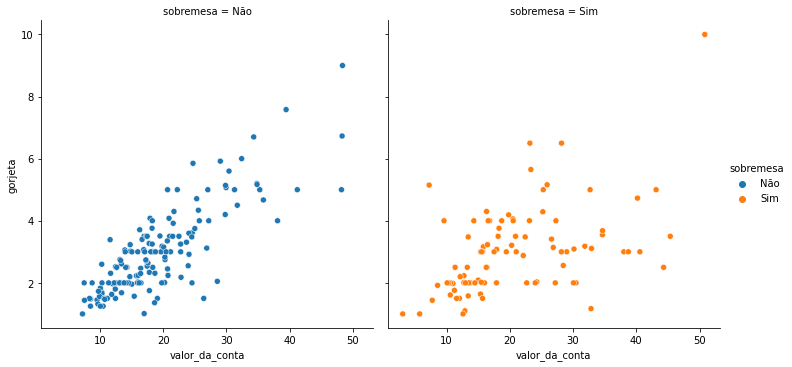

In [53]:
sns.relplot(x='valor_da_conta', y='gorjeta', hue='sobremesa',col='sobremesa', data=gorjetas)

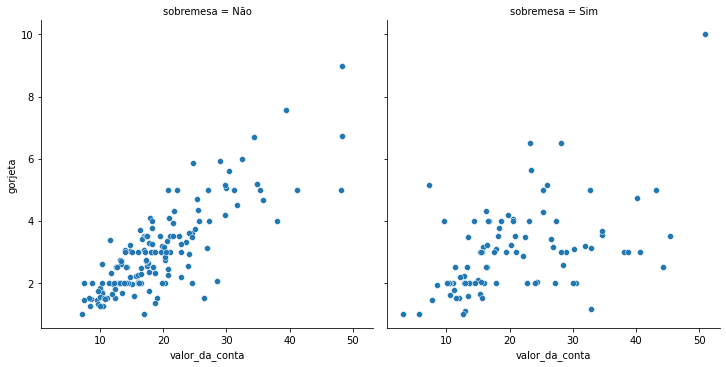

In [54]:
sns.relplot(x='valor_da_conta', y='gorjeta',col='sobremesa', data=gorjetas)

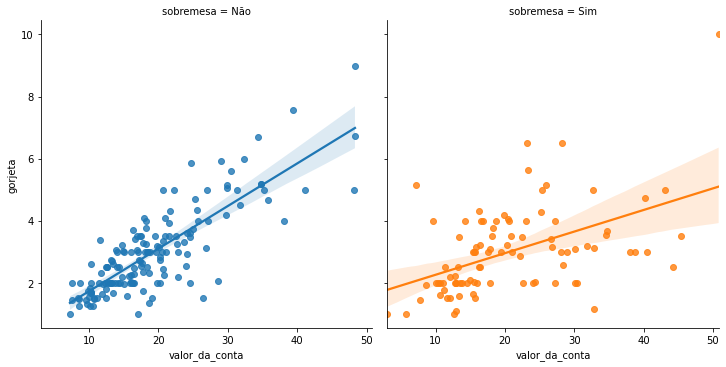

In [55]:
sns.lmplot(x='valor_da_conta', y='gorjeta', col='sobremesa', hue='sobremesa', data=gorjetas)

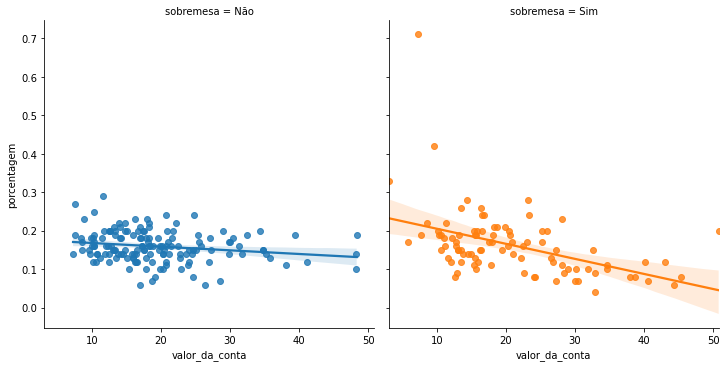

In [56]:
# cria um grafico de distribuição com linha
sns.lmplot(x='valor_da_conta', y='porcentagem', col='sobremesa', hue='sobremesa', data=gorjetas)

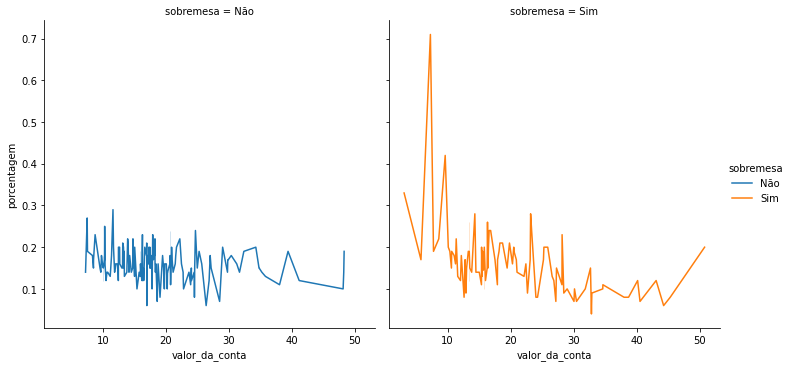

In [57]:
# col -> separa a coluna pelo indice sobremesa, hue -> altera a cor pelo indice sobremesa
sns.relplot(x='valor_da_conta', y='porcentagem',col='sobremesa',hue='sobremesa', kind='line', data=gorjetas)

#### Visualmente existe uma diferença no valor da gorjeta daqueles que pediram sobremesa e daqueles que não pediram sobremesa

## Teste de hipótese

#### **H<sup>null</sup>**
** A distribuição da taxa da gorjeta é a mesma nos dois grupos**

#### **H<sup>alt</sup>**
** A distribuição da taxa da gorjeta não é a mesma nos dois grupos**

In [58]:
from scipy.stats import ranksums

In [59]:
sobremesa=gorjetas.query("sobremesa == 'Sim'").porcentagem

In [60]:
sem_sobremesa=gorjetas.query("sobremesa == 'Não'").porcentagem

In [61]:
r = ranksums(sobremesa, sem_sobremesa)

In [62]:
print('O valor do p-value é {}'.format(r.pvalue))

O valor do p-value é 0.5266635660124415


#### **H<sup>null</sup>**
** A distribuição da taxa da gorjeta é a mesma nos dois grupos**

#### O p-value representa a probabilidade daquela amostra ter acontecido dentro da população. Se a chance é pequena, geralmente p-value < 0,05, representa que um evento muito raro aconteceu, então optamos por descartar a hipótese nula, e dizer que ela pode não ser verdade.

# Análise 3 - Dia da semana

In [64]:
gorjetas.head()

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas,porcentagem
0,16.99,1.01,Não,Domingo,Jantar,2,0.06
1,10.34,1.66,Não,Domingo,Jantar,3,0.16
2,21.01,3.50,Não,Domingo,Jantar,3,0.17
3,23.68,3.31,Não,Domingo,Jantar,2,0.14
4,24.59,3.61,Não,Domingo,Jantar,4,0.15


In [65]:
# Para saber quais dias da semana temos no dataframe
gorjetas.dia_da_semana.unique()

array(['Domingo', 'Sábado', 'Quinta', 'Sexta'], dtype=object)

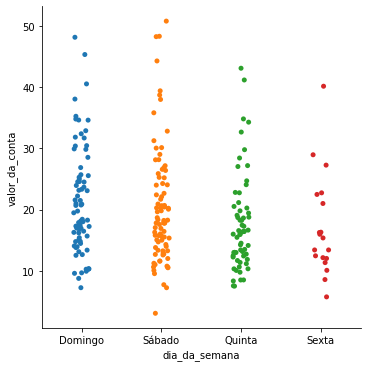

In [66]:
# Para fazer um plot categorico
sns.catplot(x= 'dia_da_semana', y='valor_da_conta', data=gorjetas)

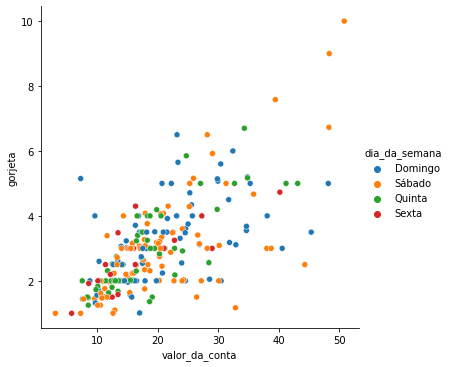

In [67]:
# Plot com todos os dados unidos
sns.relplot(x='valor_da_conta', y='gorjeta', hue='dia_da_semana', data=gorjetas)

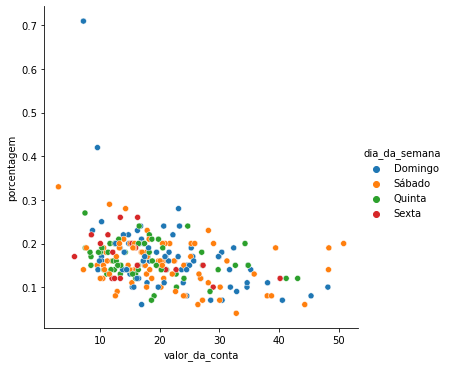

In [68]:
sns.relplot(x='valor_da_conta', y='porcentagem', hue='dia_da_semana', data=gorjetas)

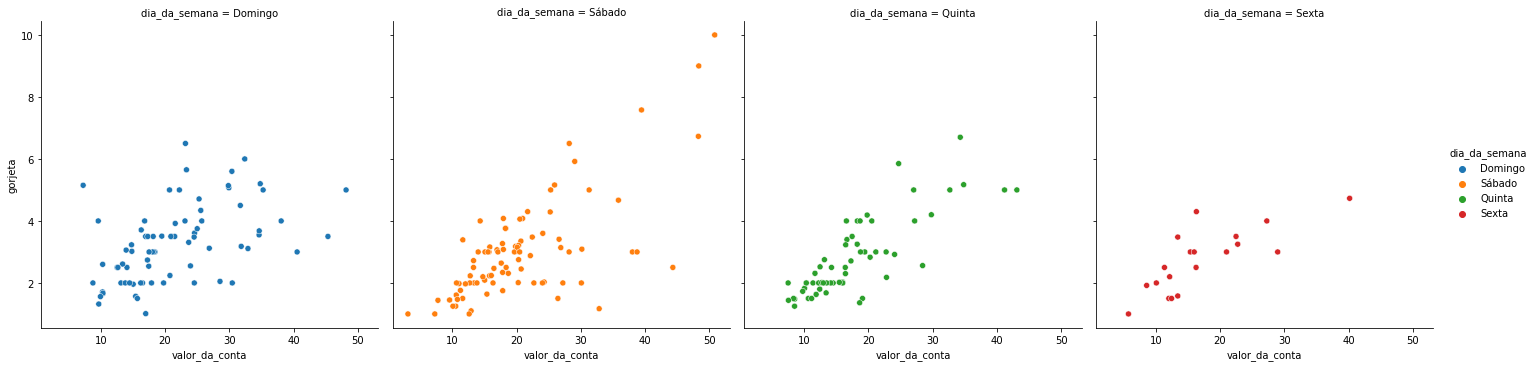

In [70]:
sns.relplot(x='valor_da_conta', y='gorjeta', hue='dia_da_semana',col= 'dia_da_semana', data=gorjetas)

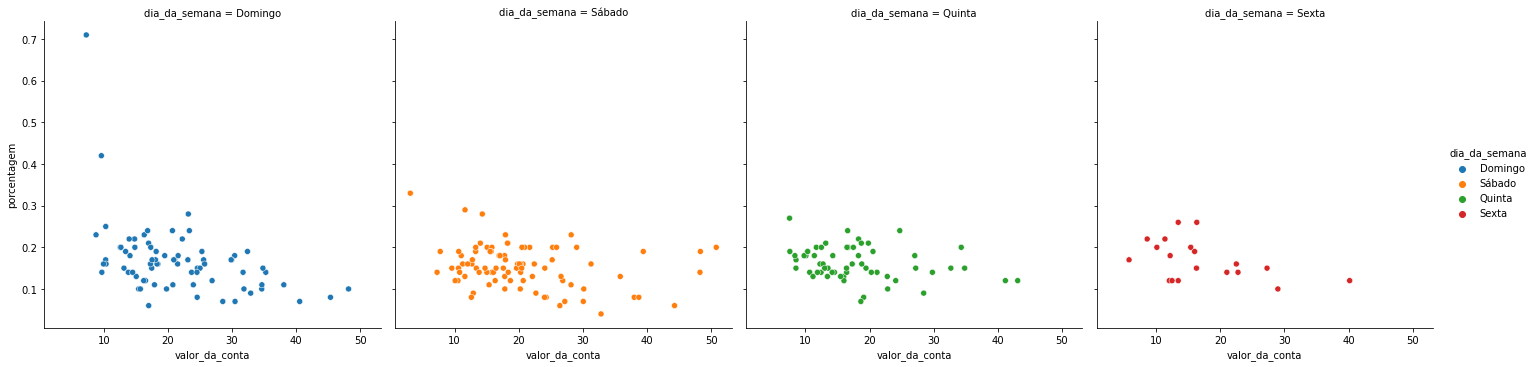

In [71]:
sns.relplot(x='valor_da_conta', y='porcentagem', hue='dia_da_semana',col= 'dia_da_semana', data=gorjetas)

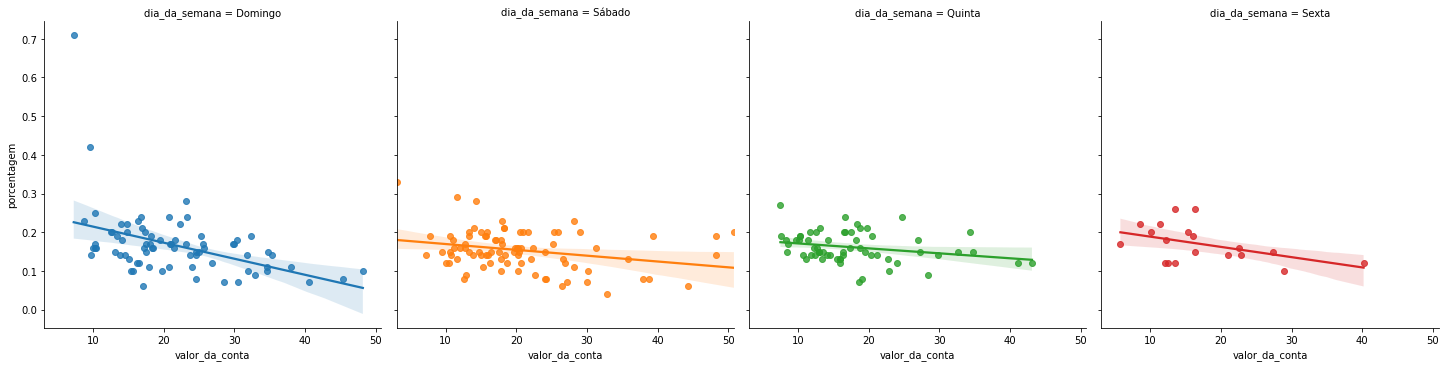

In [73]:
sns.lmplot(x='valor_da_conta', y='porcentagem', hue='dia_da_semana',col= 'dia_da_semana', data=gorjetas)

In [75]:
# média geral das gorjetas
media_geral_gorjetas = gorjetas.gorjeta.mean()

In [79]:
print('A média geral das gorjetas é de {}'.format(media_geral_gorjetas))

A média geral das gorjetas é de 2.9982786885245902


In [83]:
# Média geral de cada dia
gorjetas.groupby(['dia_da_semana']).mean()[['valor_da_conta', 'gorjeta', 'porcentagem']]

,valor_da_conta,gorjeta,porcentagem
dia_da_semana,,,
Domingo,21.410000,3.255132,0.166974
Quinta,17.682742,2.771452,0.161129
Sexta,17.151579,2.734737,0.169474
Sábado,20.441379,2.993103,0.153678


In [85]:
# Saber a frequencia de cada dia
print('Frequência dos dias')
gorjetas.dia_da_semana.value_counts()

Frequência dos dias


Sábado     87
Domingo    76
Quinta     62
Sexta      19
Name: dia_da_semana, dtype: int64

## Teste de hipótese

#### **H<sup>null</sup>**
**A distribuição do valor da conta é igual no sábado e no domigo**

#### **H<sup>alt</sup>**
**A distribuição do valor da conta não é igual no sábado e no domigo**

In [89]:
valor_conta_domingo=gorjetas.query("dia_da_semana == 'Domingo'").valor_da_conta

In [90]:
valor_conta_sabado=gorjetas.query("dia_da_semana == 'Sábado'").valor_da_conta

In [95]:
# Para ver se os dois grupos são iguais ou diferentes
r2 = ranksums(valor_conta_domingo,valor_conta_sabado)
print('O valor do p-value é {}'.format(r2.pvalue))

O valor do p-value é 0.3576728477868443


#### **H<sup>null</sup>**
**A distribuição do valor da conta é igual no sábado e no domigo**

# Análise 4 - Hora do dia

In [98]:
gorjetas.hora_do_dia.unique()

array(['Jantar', 'Almoço'], dtype=object)

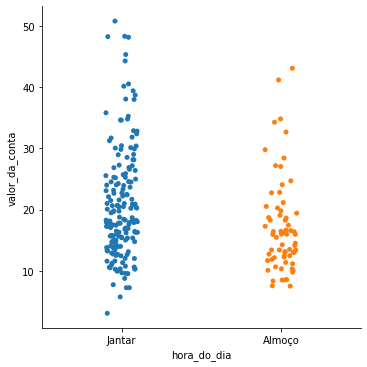

In [99]:
# Fazendo um gráfico categórico
sns.catplot(x='hora_do_dia', y='valor_da_conta', data=gorjetas)

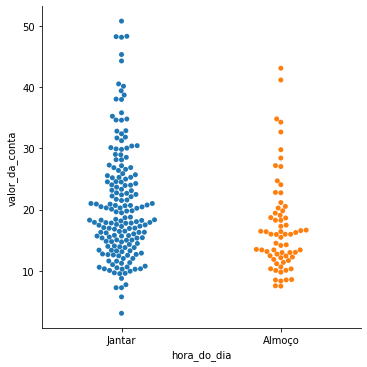

In [101]:
# swarm da uma espalhada melhor nos pontos
sns.catplot(x='hora_do_dia', y='valor_da_conta',kind='swarm', data=gorjetas)

<AxesSubplot:xlabel='hora_do_dia', ylabel='valor_da_conta'>

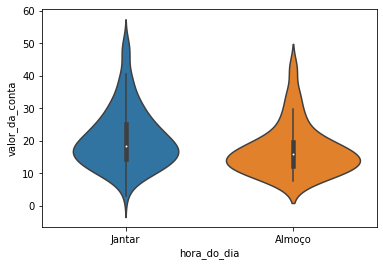

In [103]:
sns.violinplot(x='hora_do_dia',y='valor_da_conta', data=gorjetas)

<AxesSubplot:xlabel='hora_do_dia', ylabel='valor_da_conta'>

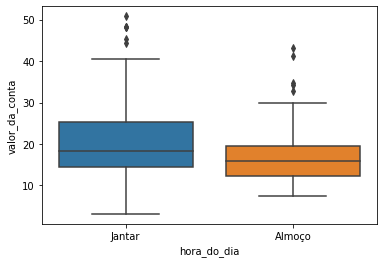

In [104]:
sns.boxplot(x='hora_do_dia', y='valor_da_conta', data=gorjetas)

In [106]:
#histograma
almoco=gorjetas.query("hora_do_dia=='Almoço'").valor_da_conta

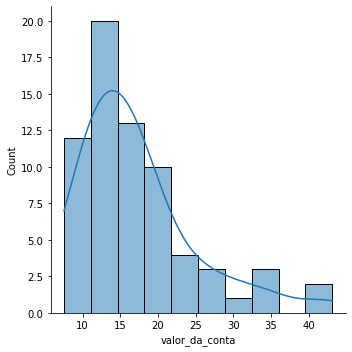

In [110]:
sns.displot(almoco, kde=True)

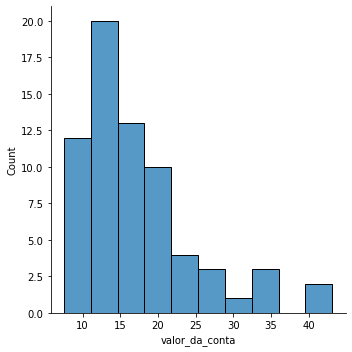

In [111]:
sns.displot(almoco, kde=False)

In [112]:
jantar=gorjetas.query("hora_do_dia=='Jantar'").valor_da_conta

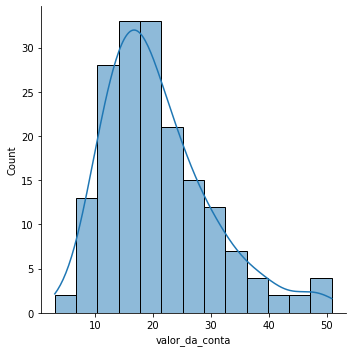

In [113]:
sns.displot(jantar, kde=True)

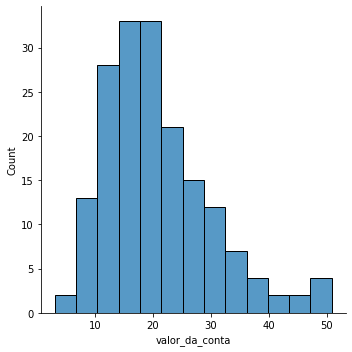

In [114]:
sns.displot(jantar, kde=False)

In [116]:
gorjetas.groupby(['hora_do_dia']).mean()[['valor_da_conta', 'gorjeta','porcentagem']]

,valor_da_conta,gorjeta,porcentagem
hora_do_dia,,,
Almoço,17.168676,2.728088,0.163971
Jantar,20.797159,3.102670,0.159773


## Teste de hipótese

#### **H<sup>null</sup>**
**A distribuição do valor da conta é igual no jantar e no almoço**

#### **H<sup>alt</sup>**
**A distribuição do valor da conta não é igual no jantar e no almoço**

In [121]:
r3 = ranksums(jantar, almoco)
print('O valor do p-value é de {}'.format(r3.pvalue))

O valor do p-value é de 0.0011791039723641672


#### **H<sup>alt</sup>**
**A distribuição do valor da conta não é igual no jantar e no almoço**

## Teste de hipótese 2

#### **H<sup>null</sup>**
**A distribuição da taxa da gorjeta é igual no jantar e no almoço**

#### **H<sup>alt</sup>**
**A distribuição da taxa da gorjeta não é igual no jantar e no almoço**

In [ ]:
porcentagem_almoco=gorjetas.query("hora_do_dia =='Almoço'").porcentagem

In [124]:
porcentagem_jantar=gorjetas.query("hora_do_dia =='Jantar'").porcentagem

In [128]:
r4=ranksums(porcentagem_almoco,porcentagem_jantar)
print('O valor do p-value é de {}'.format(r4.pvalue))

O valor do p-value é de 0.2602493995587126


#### **H<sup>null</sup>**
**A distribuição do valor da conta é igual no jantar e no almoço**
